In [1]:
import os.path as op 
import tempfile 
import matplotlib.pyplot as plt 

import hnn_core
from hnn_core import jones_2009_model, simulate_dipole
from hnn_core.viz import plot_dipole
from hnn_core import JoblibBackend
from hnn_core import read_spikes

import numpy as np 

In [2]:
#load in inverso data 
data = np.loadtxt('/Users/elizabethkaplan/Desktop/V1_Modeling/V1_HNN_Modeling/Inverso_HBM_2016_Waveform_Figs/Inverso_Data_New.txt')
print(data)

[[ 0.0000e+00  2.8764e-04]
 [ 0.0000e+00  5.7591e-04]
 [ 5.0000e+00  9.7293e-04]
 [ 5.0000e+00  1.4769e-03]
 [ 5.0000e+00  2.1634e-03]
 [ 1.0000e+01  2.9030e-03]
 [ 1.0000e+01  3.6794e-03]
 [ 1.0000e+01  4.6058e-03]
 [ 1.5000e+01  5.4205e-03]
 [ 1.5000e+01  6.2049e-03]
 [ 2.0000e+01  7.0717e-03]
 [ 2.0000e+01  7.6843e-03]
 [ 2.0000e+01  8.3534e-03]
 [ 2.5000e+01  9.1086e-03]
 [ 2.5000e+01  9.6415e-03]
 [ 2.5000e+01  1.0525e-02]
 [ 3.0000e+01  1.1571e-02]
 [ 3.0000e+01  1.2576e-02]
 [ 3.0000e+01  1.4099e-02]
 [ 3.5000e+01  1.5760e-02]
 [ 3.5000e+01  1.7385e-02]
 [ 3.5000e+01  1.9184e-02]
 [ 4.0000e+01  2.0595e-02]
 [ 4.0000e+01  2.1278e-02]
 [ 4.5000e+01  2.0975e-02]
 [ 4.5000e+01  1.8952e-02]
 [ 4.5000e+01  1.4725e-02]
 [ 5.0000e+01  7.7889e-03]
 [ 5.0000e+01 -2.4890e-03]
 [ 5.0000e+01 -1.6402e-02]
 [ 5.5000e+01 -3.4192e-02]
 [ 5.5000e+01 -5.5927e-02]
 [ 5.5000e+01 -8.1257e-02]
 [ 6.0000e+01 -1.0972e-01]
 [ 6.0000e+01 -1.4055e-01]
 [ 6.0000e+01 -1.7269e-01]
 [ 6.5000e+01 -2.0499e-01]
 

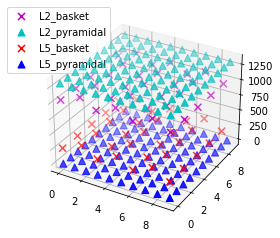

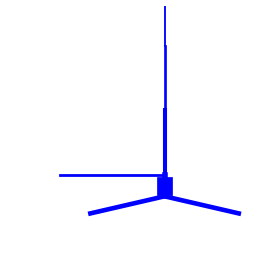

<Axes3DSubplot: >

In [3]:
#default network 
net = jones_2009_model()
net.plot_cells()
net.cell_types['L5_pyramidal'].plot_morphology()

In [4]:
# Distal Drive 
weights_ampa_d1 = {'L2_basket': 0.006562, 'L2_pyramidal': 0.000024,
                   'L5_pyramidal': 0.462475}
weights_nmda_d1 = {'L2_basket': 0.059482, 'L2_pyramidal': 0.999317,
                   'L5_pyramidal': 0.090074}
synaptic_delays_d1 = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                      'L5_pyramidal': 0.1}
net.add_evoked_drive(
    'evdist1', mu=69.53, sigma=3.85, numspikes=1, weights_ampa=weights_ampa_d1,
    weights_nmda=weights_nmda_d1, location='distal',
    synaptic_delays=synaptic_delays_d1, event_seed=274)

In [5]:
#Proximal Drives  
weights_ampa_p1 = {'L2_basket': 0.157106, 'L2_pyramidal': 0.015912,
                   'L5_basket': 0.351963, 'L5_pyramidal': 0.008033}
synaptic_delays_prox = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                        'L5_basket': 1., 'L5_pyramidal': 1.}
# all NMDA weights are zero; pass None explicitly
net.add_evoked_drive(
    'evprox1', mu=45.978867, sigma=2.771413, numspikes=1, weights_ampa=weights_ampa_p1,
    weights_nmda=None, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=544)

# Second proximal evoked drive. NB: only AMPA weights differ from first
weights_ampa_p2 = {'L2_basket': 0.000002, 'L2_pyramidal': 1.893286,
                   'L5_basket': 0.007079, 'L5_pyramidal': 0.378367}
weights_nmda_p2 = {'L2_basket': 0.227243, 'L2_pyramidal': 0.069407,
                   'L5_basket': 0.656751, 'L5_pyramidal': 0.006741}
# all NMDA weights are zero; omit weights_nmda (defaults to None)
net.add_evoked_drive(
    'evprox2', mu=142.082563, sigma=11.160701, numspikes=1,
    weights_ampa=weights_ampa_p2, weights_nmda=weights_nmda_p2,location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=814)

In [6]:
#simulate dipole, running 2 jobs 
#joblib allows jobs to run in parallel 
with JoblibBackend(n_jobs=1):
    dpls = simulate_dipole(net, tstop=170., record_vsec='soma')

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /Users/elizabethkaplan/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


In [7]:
# Cell IDs (gids) uniquely define neurons in the network 
gid_ranges = net.gid_ranges
print(net.gid_ranges)

{'L2_basket': range(0, 35), 'L2_pyramidal': range(35, 135), 'L5_basket': range(135, 170), 'L5_pyramidal': range(170, 270), 'evdist1': range(270, 540), 'evprox1': range(540, 810), 'evprox2': range(810, 1080)}


In [8]:
#CellResponse object stores data produced by individual cells, including spikes, voltages, and currents 
trial_idx = 0
vsec = net.cell_response.vsec[trial_idx]
print(vsec.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

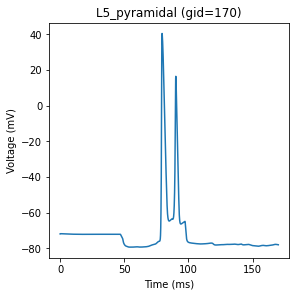

In [9]:
#plot firing pattern of individual cells 
gid = 170
plt.figure(figsize=(4, 4), constrained_layout=True)
plt.plot(net.cell_response.times, vsec[gid]['soma'])
plt.title('%s (gid=%d)' % (net.gid_to_type(gid), gid))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.show()

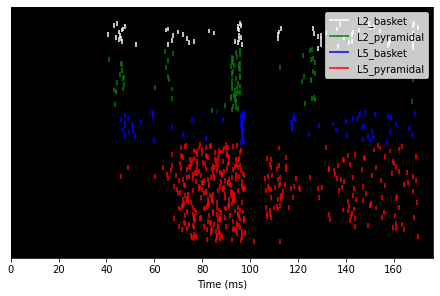

Writing file /var/folders/s6/21s_2dfj2f195fl1lglp7jrw0000gn/T/tmp0a2snde2/spk_0.txt


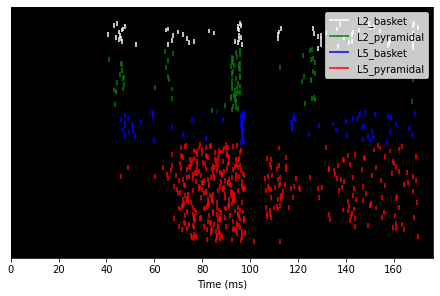

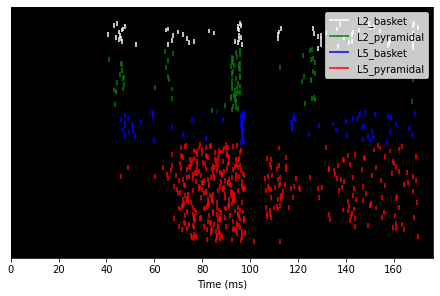

In [10]:
#plot the spikes in the network and write them to txt files 
net.cell_response.plot_spikes_raster()
with tempfile.TemporaryDirectory() as tmp_dir_name:
    net.cell_response.write(op.join(tmp_dir_name, 'spk_%d.txt'))
    cell_response = read_spikes(op.join(tmp_dir_name, 'spk_*.txt'))
cell_response.plot_spikes_raster()

In [11]:
#calculate mean spike rates for each cell class 
all_rates = cell_response.mean_rates(tstart=0, tstop=170,
                                     gid_ranges=net.gid_ranges,
                                     mean_type='all')
trial_rates = cell_response.mean_rates(tstart=0, tstop=170,
                                       gid_ranges=net.gid_ranges,
                                       mean_type='trial')
print('Mean spike rates across trials:')
print(all_rates)
print('Mean spike rates for individual trials:')
print(trial_rates)

Mean spike rates across trials:
{'L2_basket': 12.436974789915965, 'L2_pyramidal': 5.0588235294117645, 'L5_basket': 14.117647058823529, 'L5_pyramidal': 24.29411764705883}
Mean spike rates for individual trials:
{'L2_basket': [12.436974789915965], 'L2_pyramidal': [5.0588235294117645], 'L5_basket': [14.117647058823529], 'L5_pyramidal': [24.29411764705883]}


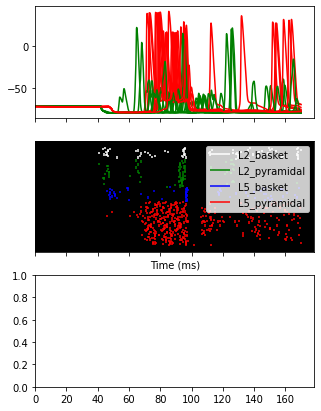

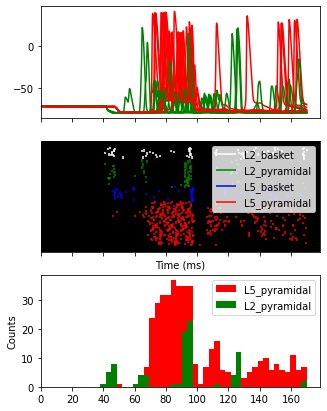

In [12]:
#plot soma voltage along with spiking activity
fig, axes = plt.subplots(3, 1, figsize=(5, 7), sharex=True)

for idx in range(10):  # only 10 cells per cell-type
    gid = gid_ranges['L2_pyramidal'][idx]
    axes[0].plot(net.cell_response.times, vsec[gid]['soma'], color='g')
    gid = gid_ranges['L5_pyramidal'][idx]
    axes[0].plot(net.cell_response.times, vsec[gid]['soma'], color='r')
net.cell_response.plot_spikes_raster(ax=axes[1])
net.cell_response.plot_spikes_hist(ax=axes[2],
                                   spike_types=['L5_pyramidal',
                                                'L2_pyramidal'])

In [13]:
#smoothing and scaling 
window_len, scaling_factor = 30, 3000
for dpl in dpls:
    dpl.smooth(window_len).scale(scaling_factor)

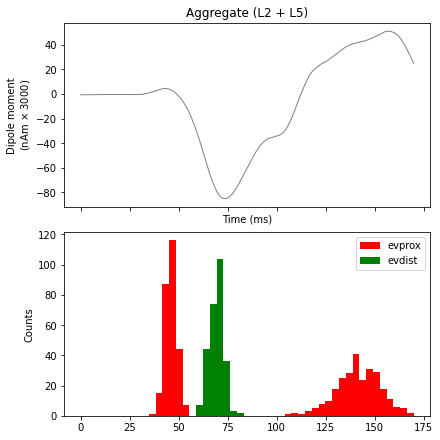

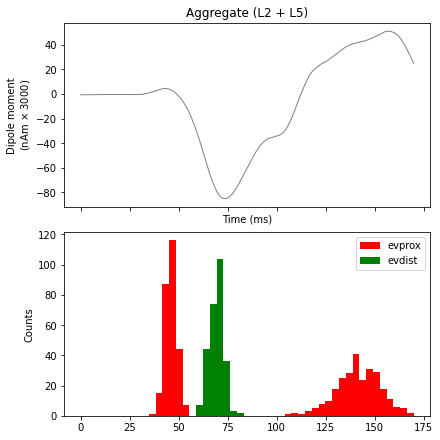

In [14]:
#plt simulated aggregated dipole moments over time 
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6, 6),
                         constrained_layout=True)
plot_dipole(dpls, ax=axes[0], layer='agg', show=False)
net.cell_response.plot_spikes_hist(ax=axes[1], spike_types=['evprox', 'evdist'])

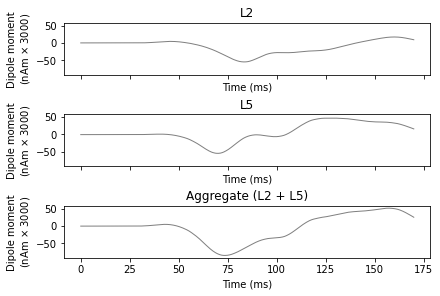

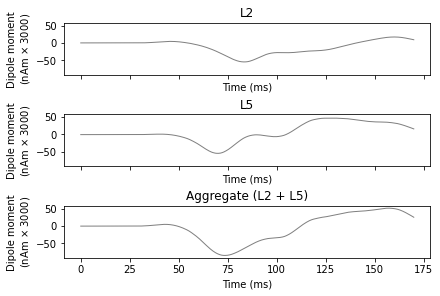

In [15]:
#visualize layer contributions seperately 
plot_dipole(dpls, average=False, layer=['L2', 'L5', 'agg'], show=False)

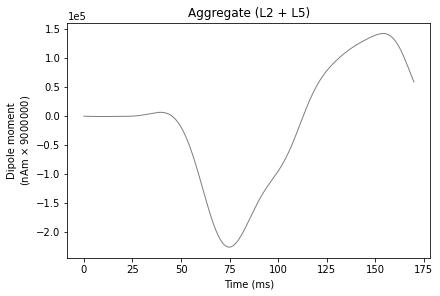

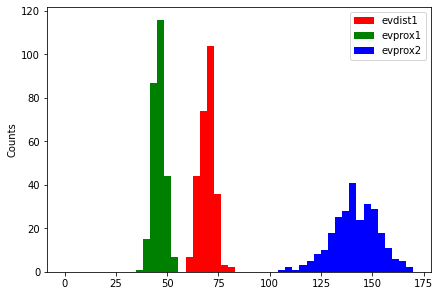

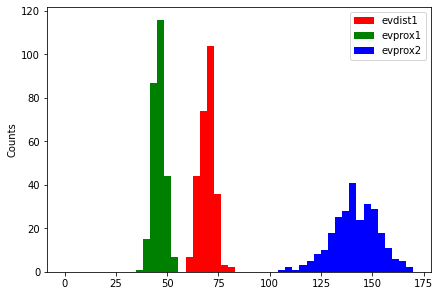

In [16]:
#simulate the network 
trial_idx = 0
dpls[trial_idx].copy().smooth(window_len).scale(scaling_factor).plot()
net.cell_response.plot_spikes_hist()